In [ ]:
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import datetime
import time
from sklearn.impute import KNNImputer

In [2]:
start_date = '2017-01-01'
end_date = datetime.date.today()
symbol = [ "^GSPC", "^DJI", "^IXIC", "^RUT", "PL=F",
    "EURUSD=X", "JPY=X", "CAD=X", "UUP",
    "^TNX", "^IRX", "TLT",
    "CL=F", "GC=F", "BZ=F",
    "^GDAXI", "^FTSE", "^N225",
    "XRT", "XLK", "XLF", "SI=F", "AUDUSD=X", "^N100", 
    "^IBEX", "^FCHI", "^HSI", "^TWII", "BTC-USD"
]
data_history = yf.download(symbol, start=start_date, end=end_date)['Close']#.dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  29 of 29 completed


In [ ]:
print(data_history.isnull().sum())

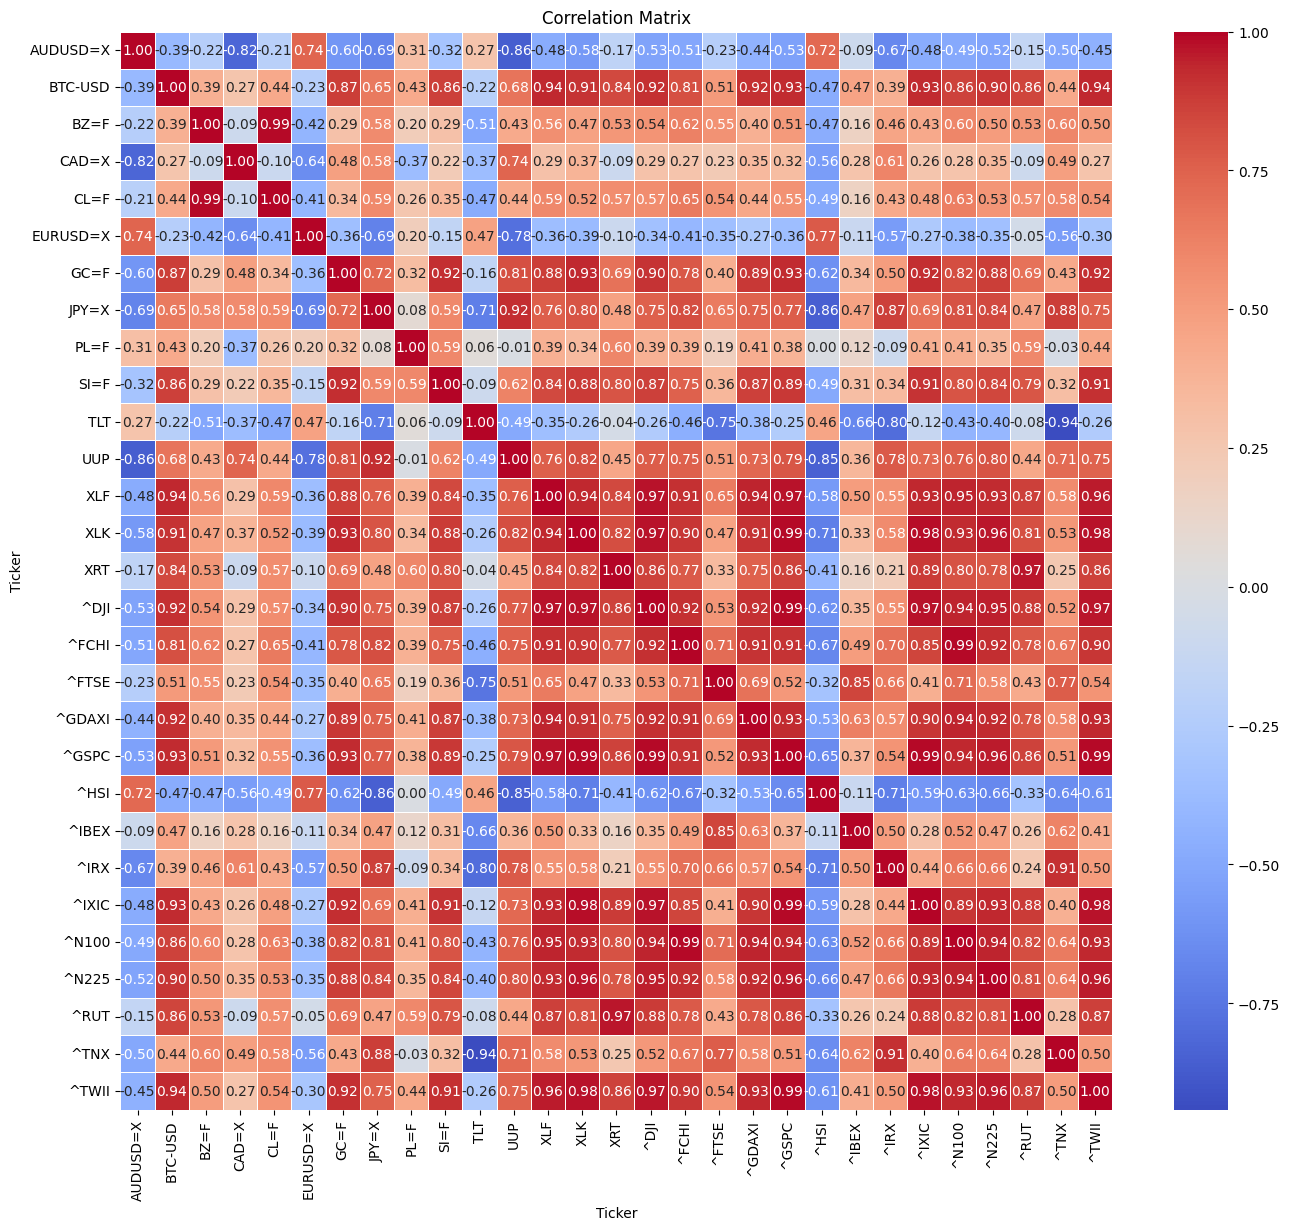

In [11]:
correlation_matrix = data_history.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:

#scalador = MinMaxScaler()
#data_scaled = scalador.fit_transform(data_history)
imputer = KNNImputer(n_neighbors=2, weights="distance")
data_unifor = imputer.fit_transform(data_history)
#data_imputed = scalador.inverse_transform(data_unifor)
data = pd.DataFrame(data_unifor, columns=data_history.columns, index=data_history.index)

In [ ]:
print(data.isnull().sum())

In [23]:
log_returns = np.log(data / data.shift(1))
data = log_returns.dropna()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [24]:
print(data)

Ticker      AUDUSD=X   BTC-USD      BZ=F     CAD=X      CL=F  EURUSD=X  \
Date                                                                     
2017-01-02 -0.057414  0.023193  0.009077  0.023880  0.001099 -0.012170   
2017-01-03 -0.001801  0.021389 -0.014324  0.000551 -0.015283 -0.006380   
2017-01-04  0.004588  0.100960  0.017690 -0.001459  0.017616 -0.003842   
2017-01-05  0.007868 -0.130575  0.007587 -0.009191  0.009344  0.007741   
2017-01-06  0.007020 -0.116209  0.003685 -0.005247  0.004269  0.009952   
...              ...       ...       ...       ...       ...       ...   
2025-04-17  0.005523  0.010204  0.031540 -0.006996  0.034766  0.009178   
2025-04-18 -0.004825 -0.005255 -0.019585  0.000438 -0.021061 -0.002017   
2025-04-19 -0.007871  0.007228  0.076835  0.022783  0.081040 -0.029572   
2025-04-20 -0.007712  0.001303  0.032908  0.013707  0.034404 -0.019485   
2025-04-21  0.017102  0.027155 -0.115491 -0.030165 -0.119431  0.037819   

Ticker          GC=F     JPY=X      P

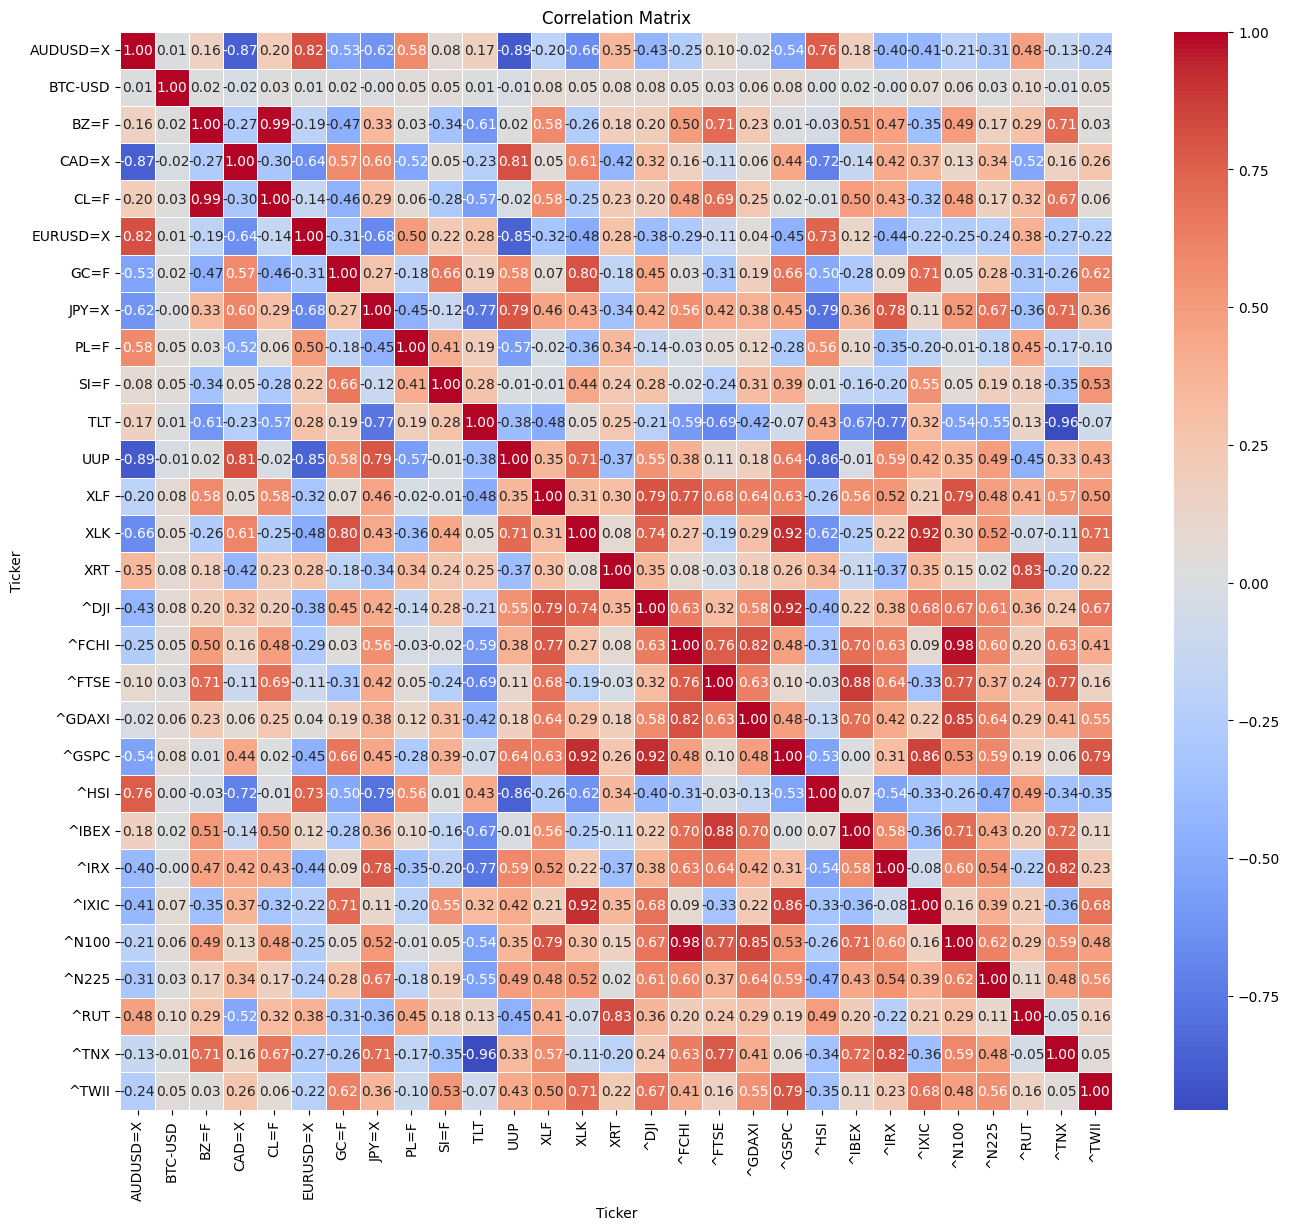

In [25]:
correlation_matrix = data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

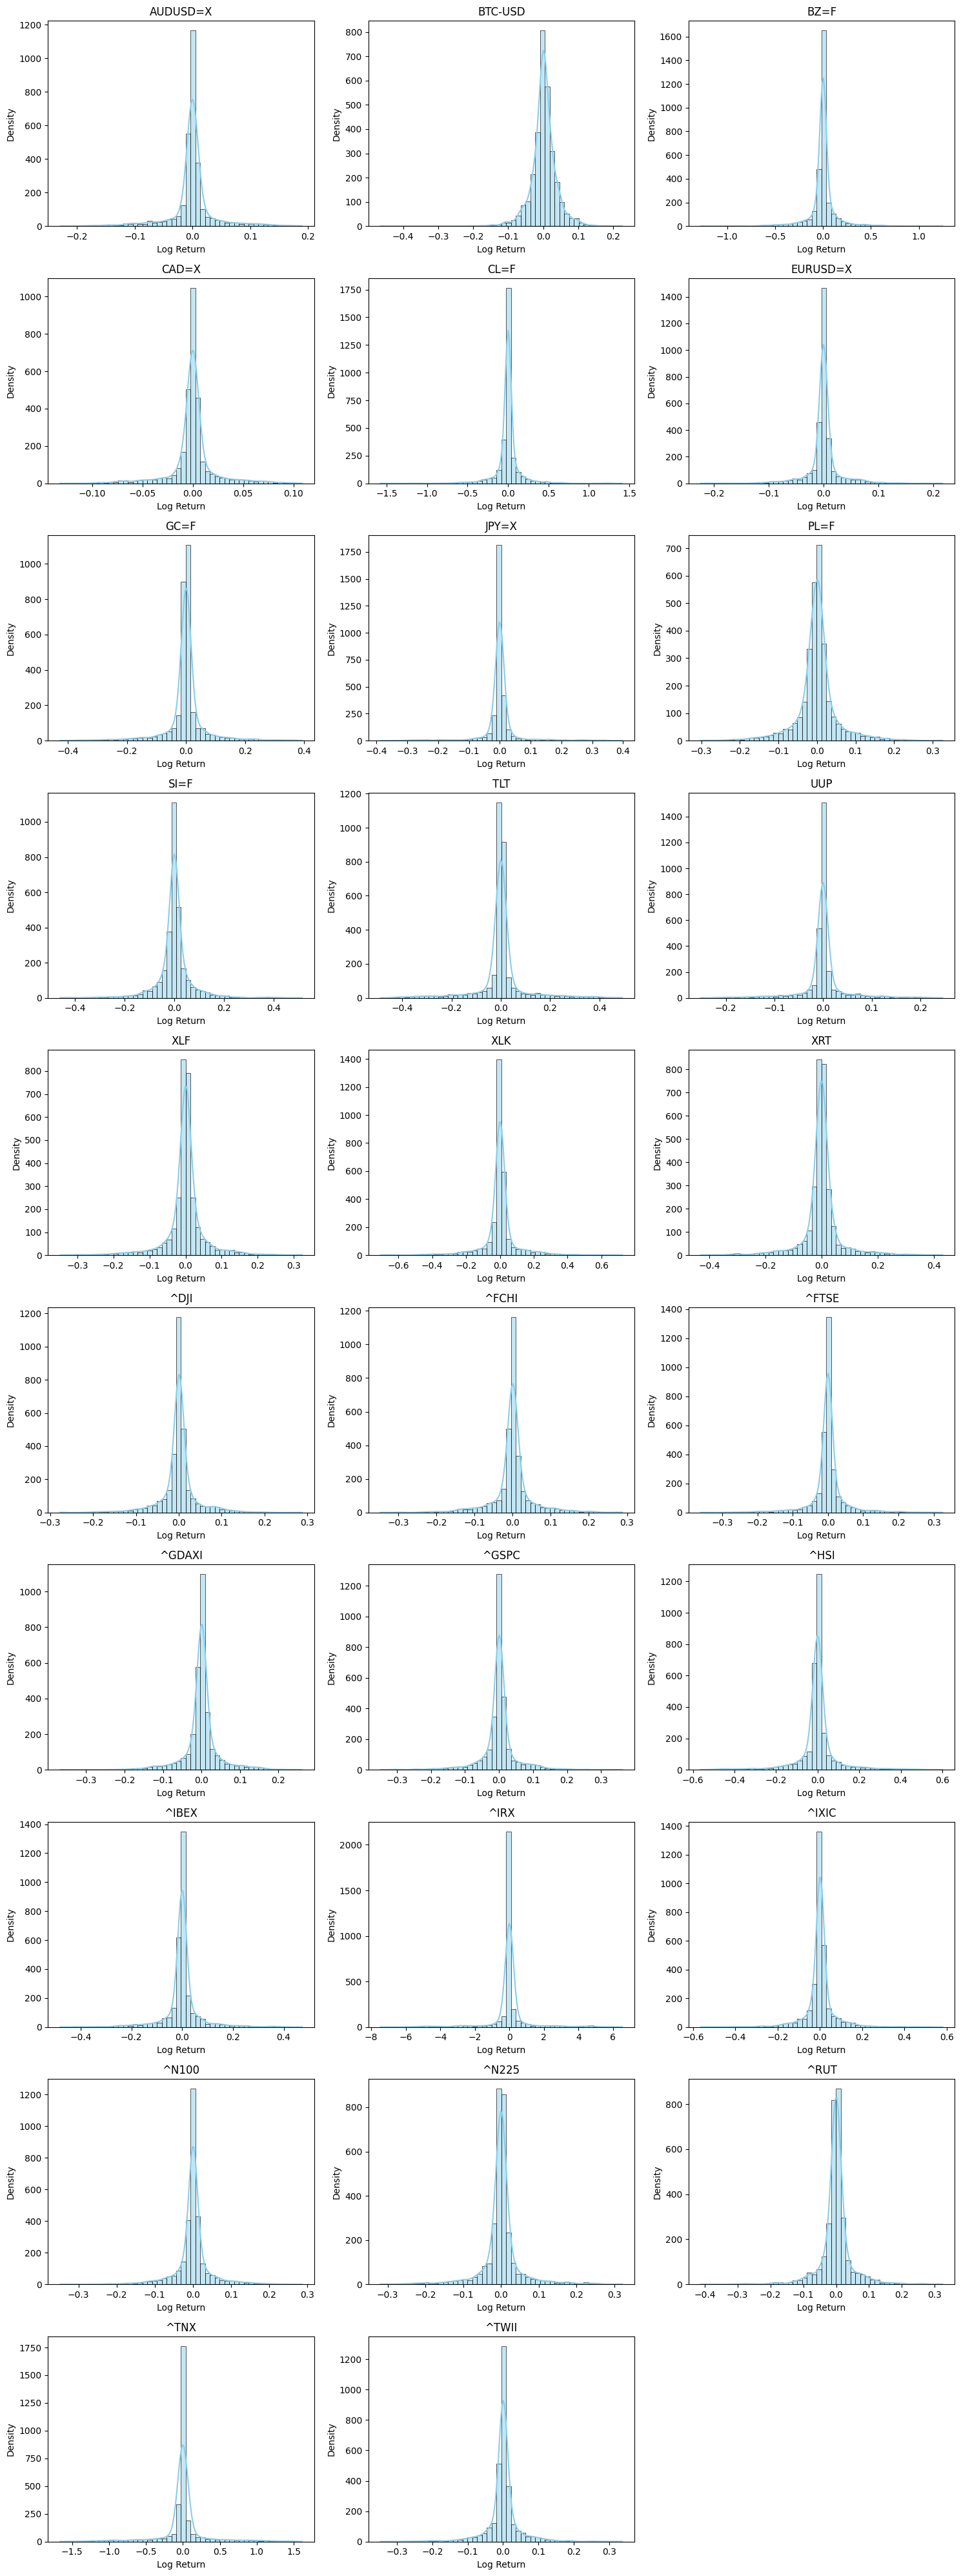

In [26]:
cols = 3  # cantidad de columnas por fila
variables = data.columns
rows = int(np.ceil(len(variables) / cols))

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # para indexar fácilmente

# Graficar cada distribución
for i, var in enumerate(variables):
    sns.histplot(data[var], kde=True, ax=axes[i], bins=50, color='skyblue')
    axes[i].set_title(var)
    axes[i].set_xlabel('Log Return')
    axes[i].set_ylabel('Density')

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import shapiro, normaltest

for col in data.columns:
    stat, p = shapiro(data[col])  # o normaltest()
    print(f"{col}: p-value = {p:.4f}")


AUDUSD=X: p-value = 0.0000
BTC-USD: p-value = 0.0000
BZ=F: p-value = 0.0000
CAD=X: p-value = 0.0000
CL=F: p-value = 0.0000
EURUSD=X: p-value = 0.0000
GC=F: p-value = 0.0000
JPY=X: p-value = 0.0000
PL=F: p-value = 0.0000
SI=F: p-value = 0.0000
TLT: p-value = 0.0000
UUP: p-value = 0.0000
XLF: p-value = 0.0000
XLK: p-value = 0.0000
XRT: p-value = 0.0000
^DJI: p-value = 0.0000
^FCHI: p-value = 0.0000
^FTSE: p-value = 0.0000
^GDAXI: p-value = 0.0000
^GSPC: p-value = 0.0000
^HSI: p-value = 0.0000
^IBEX: p-value = 0.0000
^IRX: p-value = 0.0000
^IXIC: p-value = 0.0000
^N100: p-value = 0.0000
^N225: p-value = 0.0000
^RUT: p-value = 0.0000
^TNX: p-value = 0.0000
^TWII: p-value = 0.0000


In [30]:
data.columns

Index(['AUDUSD=X', 'BTC-USD', 'BZ=F', 'CAD=X', 'CL=F', 'EURUSD=X', 'GC=F',
       'JPY=X', 'PL=F', 'SI=F', 'TLT', 'UUP', 'XLF', 'XLK', 'XRT', '^DJI',
       '^FCHI', '^FTSE', '^GDAXI', '^GSPC', '^HSI', '^IBEX', '^IRX', '^IXIC',
       '^N100', '^N225', '^RUT', '^TNX', '^TWII'],
      dtype='object', name='Ticker')

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
def create_dataset(dataset):
    look_back=24
    data_x, data_y = [], []
    for i in range(look_back, len(dataset)):
        data_x.append(dataset[i - look_back:i, :])
        data_y.append(dataset[i, 19])
        print(f'data_x: {data_x}')
        print(f'data_y: {data_y}')
    return np.array(data_x), np.array(data_y)

In [ ]:
data = create_dataset(data_scaled)

In [48]:
def split_data(X, y, train_ratio=0.8):
        train_size = int(len(X) * train_ratio)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        return X_train, X_test, y_train, y_test

In [ ]:
def build_model(units=50, dropout_rate=0.2, dense_units=20, learning_rate=0.001, activation='tanh'):
        model = Sequential()
        model.add(LSTM(units, activation=activation, dropout=dropout_rate,
                       recurrent_dropout=dropout_rate, input_shape=(look_back, shape([1]))))
        model.add(Dropout(dropout_rate))
        model.add(Dense(dense_units, activation=activation))
        model.add(Dense(1))
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(loss='mean_squared_error', optimizer=optimizer)
        return model

In [ ]:
def train_model(X_train, y_train, X_val, y_val, epochs=50, batch_size=32, use_early_stopping=True):
        callbacks = []
        if use_early_stopping:
            callbacks.append(EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))
        history = model.fit(X_train, y_train,
                                 validation_data=(X_val, y_val),
                                 epochs=epochs, batch_size=batch_size,
                                 callbacks=callbacks, verbose=2)
        return history

In [ ]:
history = model.fit(X_train, y_train,
                                 validation_data=(X_val, y_val),
                                 epochs=epochs, batch_size=batch_size,
                                 callbacks=callbacks, verbose=2)